# Libraries and the usual

In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
#bold font and set font color for easier readibility
def printf(message, newLine = True):
    out = '\x1b[0;30;43m' + '\033[1m' + message + '\033[0m' + '\x1b[0m'
    print(out) if newLine else print(out, end='')
    
printf("Printout like these are part of the author's narrative")

Printout like these are part of the author's narrative


In [3]:
#dynamically resize notebook width to screensize for easier visibility in presentation
#RUN THIS BEFORE PRESENTATION
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

pd.options.display.float_format = '{:,.3f}'.format

# Load data

In [4]:
#load data file
df = pd.read_csv('Data\electronics.csv', encoding = "ISO-8859-1")
printf("\nSample top 5 rows of data :\n")
df.head()


Sample top 5 rows of data :



,id,prices_amountmax,prices_amountmin,prices_currency,prices_dateseen,prices_merchant,prices_shipping,brand,categories,dateadded,dateupdated,manufacturer,name,primarycategories,weight
0,AVphzgbJLJeJML43fA0o,104.990,104.990,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",Bestbuy.com,NaN,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",2015-04-13T12:00:51Z,2018-05-12T18:59:48Z,NaN,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,32.8 pounds
1,AVpgMuGwLJeJML43KY_c,69.000,64.990,USD,2017-12-14T06:00:00Z,Walmart.com,Expedited,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,14 pounds
2,AVpgMuGwLJeJML43KY_c,69.000,69.000,USD,2017-09-08T05:00:00Z,Walmart.com,Expedited,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,14 pounds
3,AVpgMuGwLJeJML43KY_c,69.990,69.990,USD,2017-10-10T05:00:00Z,Bestbuy.com,NaN,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,14 pounds
4,AVpgMuGwLJeJML43KY_c,66.990,66.990,USD,2017-08-28T07:00:00Z,Bestbuy.com,NaN,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,14 pounds


# Understanding the data

In [5]:
#Familiarizing the data
printf("Rows = ", False); print(df.shape[0])
printf("Columns = ", False); print(df.shape[1])
printf("\nData integrity :"); print(df.info(verbose=True))
printf("\nData statistics :\n"); print(df.describe())

# See unique values for each col
printf("\nThe number of unique values = ", False); df.nunique()

Rows = 7249
Columns = 15

Data integrity :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7249 non-null   object 
 1   prices_amountmax   7249 non-null   float64
 2   prices_amountmin   7249 non-null   float64
 3   prices_currency    7249 non-null   object 
 4   prices_dateseen    7249 non-null   object 
 5   prices_merchant    7249 non-null   object 
 6   prices_shipping    4277 non-null   object 
 7   brand              7249 non-null   object 
 8   categories         7249 non-null   object 
 9   dateadded          7249 non-null   object 
 10  dateupdated        7249 non-null   object 
 11  manufacturer       3235 non-null   object 
 12  name               7249 non-null   object 
 13  primarycategories  7249 non-null   object 
 14  weight             7249 non-null   object 
dtypes: float64(2), object(13)
mem

id                    835
prices_amountmax     2519
prices_amountmin     2668
prices_currency         2
prices_dateseen      3834
prices_merchant       693
prices_shipping        74
brand                 257
categories            803
dateadded             799
dateupdated           737
manufacturer          198
name                  828
primarycategories       5
weight                587
dtype: int64

# Data Cleaning

## Duplication

In [6]:
printf("3 rows are duplicated")
df[df.duplicated(keep=False)]

3 rows are duplicated


,id,prices_amountmax,prices_amountmin,prices_currency,prices_dateseen,prices_merchant,prices_shipping,brand,categories,dateadded,dateupdated,manufacturer,name,primarycategories,weight
1666,AVpg9lcJ1cnluZ0-8h3k,"4,295.980","4,295.980",USD,2018-05-26T07:00:00Z,Bestbuy.com,NaN,SunBriteTV,"LED & LCD TVs,TVs,Outdoor TVs,All Flat-Screen ...",2016-09-03T17:22:23Z,2018-05-16T16:25:57Z,NaN,Pro-Series 49-Class Full HD Outdoor LED TV (Si...,Electronics,4.00 lb
1667,AVpg9lcJ1cnluZ0-8h3k,"4,295.980","4,295.980",USD,2018-05-26T07:00:00Z,Bestbuy.com,NaN,SunBriteTV,"LED & LCD TVs,TVs,Outdoor TVs,All Flat-Screen ...",2016-09-03T17:22:23Z,2018-05-16T16:25:57Z,NaN,Pro-Series 49-Class Full HD Outdoor LED TV (Si...,Electronics,4.00 lb
1964,AVqVGTt2v8e3D1O-ldE7,"2,799.990","2,799.990",USD,2018-05-26T07:00:00Z,Bestbuy.com,NaN,SunBriteTV,"LED & LCD TVs,TVs,Outdoor TVs,Electronics,Tele...",2017-03-03T16:55:43Z,2018-06-13T19:36:45Z,NaN,SunBriteTV - Signature Series - 43 Class - LED...,Electronics,41.5 pounds
1966,AVqVGTt2v8e3D1O-ldE7,"2,799.990","2,799.990",USD,2018-05-26T07:00:00Z,Bestbuy.com,NaN,SunBriteTV,"LED & LCD TVs,TVs,Outdoor TVs,Electronics,Tele...",2017-03-03T16:55:43Z,2018-06-13T19:36:45Z,NaN,SunBriteTV - Signature Series - 43 Class - LED...,Electronics,41.5 pounds
1968,AVqVGTt2v8e3D1O-ldE7,"2,799.990","2,799.990",USD,2018-05-26T07:00:00Z,Bestbuy.com,NaN,SunBriteTV,"LED & LCD TVs,TVs,Outdoor TVs,Electronics,Tele...",2017-03-03T16:55:43Z,2018-06-13T19:36:45Z,NaN,SunBriteTV - Signature Series - 43 Class - LED...,Electronics,41.5 pounds


In [7]:
printf("Duplicate rows dropped")
df.drop_duplicates(keep='first', inplace=True)
printf("\nRemaining rows = ", False); print(df.shape[0])

Duplicate rows dropped

Remaining rows = 7246


## Missing Data

In [8]:
printf("Missing data is found in prices_shipping and manufacturer")
printf("We will do nothing for the null data for now and treat it during pre-preprocessing")
printf("\nTypes of shipping methods:")
df.prices_shipping.unique()

Missing data is found in prices_shipping and manufacturer
We will do nothing for the null data for now and treat it during pre-preprocessing

Types of shipping methods:


array([nan, 'Expedited', 'Value', 'Standard', 'Free Shipping',
       'Free Shippingon orders 35 and up', 'Free Expedited Shipping',
       'Free Shipping on orders 35 and up',
       'Free Expedited Shipping for most orders over $49', 'FREE',
       'Freight', 'Free Shipping for this Item', 'USD 7.95', 'USD 7.25',
       'USD 26.09', 'USD 10.00',
       'Free Standard Shipping on Orders Over $49', 'Free Delivery',
       'USD 11.30', 'USD 15.42', 'USD 35.03', 'USD 0.99',
       'Shipping Charges Apply', 'USD 60.00', 'USD 15.68', 'USD 5.99',
       'USD 196.92', 'USD 22.64', 'USD 20.00', 'USD 13.32', 'USD 12.78',
       'USD 13.25', 'USD 25.00', 'USD 6.65', 'USD 2.85', 'USD 7.81',
       'USD 10.10', 'USD 75.00', 'USD 13.95', 'Free Standard Shipping',
       'USD 20.55', 'USD 18.60', 'USD 11.75', 'USD 25.76', 'USD 27.94',
       'USD 14.00', 'USD 13.60', 'USD 5.00', 'USD 13.61', 'USD 3.99',
       'USD 7.50', 'USD 2.99', 'USD 12.21', 'USD 3.39', 'USD 22.13',
       'USD 6.00', 'USD 4.8

## Reduce dimensionality

In [9]:
printf("We will drop the column manufacturer, dateadded, dateupdated since we are not using it")
df.drop(['manufacturer', 'dateadded', 'dateupdated'], axis=1, inplace=True)

We will drop the column manufacturer, dateadded, dateupdated since we are not using it


# Data Preprocessing & Feature Engineering

## Shipping - add shipping provided, free shipping, shipping charges

In [10]:
printf("Range of values in shipping:")
df.prices_shipping.unique()

Range of values in shipping:


array([nan, 'Expedited', 'Value', 'Standard', 'Free Shipping',
       'Free Shippingon orders 35 and up', 'Free Expedited Shipping',
       'Free Shipping on orders 35 and up',
       'Free Expedited Shipping for most orders over $49', 'FREE',
       'Freight', 'Free Shipping for this Item', 'USD 7.95', 'USD 7.25',
       'USD 26.09', 'USD 10.00',
       'Free Standard Shipping on Orders Over $49', 'Free Delivery',
       'USD 11.30', 'USD 15.42', 'USD 35.03', 'USD 0.99',
       'Shipping Charges Apply', 'USD 60.00', 'USD 15.68', 'USD 5.99',
       'USD 196.92', 'USD 22.64', 'USD 20.00', 'USD 13.32', 'USD 12.78',
       'USD 13.25', 'USD 25.00', 'USD 6.65', 'USD 2.85', 'USD 7.81',
       'USD 10.10', 'USD 75.00', 'USD 13.95', 'Free Standard Shipping',
       'USD 20.55', 'USD 18.60', 'USD 11.75', 'USD 25.76', 'USD 27.94',
       'USD 14.00', 'USD 13.60', 'USD 5.00', 'USD 13.61', 'USD 3.99',
       'USD 7.50', 'USD 2.99', 'USD 12.21', 'USD 3.39', 'USD 22.13',
       'USD 6.00', 'USD 4.8

In [11]:
printf("We assume: (i) all shipping is local, ie. within USA")
printf("           (ii) null values found in prices_shipping implies shipping charges are not provided upfront")
printf("\nNew column 'shipping_provided' created to indicate whether shipping is explicitly provided or not with the following values:")

#Shipping Charges Apply = shipping not provided
df["prices_shipping"].replace({"Shipping Charges Apply": np.nan}, inplace=True)
#if shipping charges provided, 1. If not, 0
df['shipping_provided'] = df['prices_shipping'].apply(lambda x: 0 if pd.isnull(x) else 1)
df.shipping_provided.unique()

We assume: (i) all shipping is local, ie. within USA
           (ii) null values found in prices_shipping implies shipping charges are not provided upfront

New column 'shipping_provided' created to indicate whether shipping is explicitly provided or not with the following values:


array([0, 1], dtype=int64)

In [12]:
printf("We assume: (i) items of all values tagged with combined shipping promotion is free shipping")
printf("           (ii) items with designated shipping without additional cost to buyer are free shipping")
printf("                (Free, FREE, Expedited, Value, Standard, Freight) ")
printf("\nNew column 'shipping_free' created to show items that are shipped free of charge with the following values:")

df['shipping_free'] = None

#creating search phrases to determine shipping
keyword_search = ["Free", "FREE", "Expedited", "Value", "Standard", "Freight"]
    
def get_shipping_free(df):
    for i in df.index:
        charge = df.at[i, 'prices_shipping']
        #if free shipping, 1. If not, 0
        for word in keyword_search:
            if word in str(charge):
                df.at[i, 'shipping_free'] = 1
                break;
            else:
                df.at[i, 'shipping_free'] = 0

get_shipping_free(df)
df.shipping_free.unique()

We assume: (i) items of all values tagged with combined shipping promotion is free shipping
           (ii) items with designated shipping without additional cost to buyer are free shipping
                (Free, FREE, Expedited, Value, Standard, Freight) 

New column 'shipping_free' created to show items that are shipped free of charge with the following values:


array([0, 1], dtype=object)

In [13]:
printf("\nNew column 'shipping_charges' created to show cost of shipping charged to buyers: ")

df['shipping_charges'] = None

#creating search phrases to determine shipping
keyword_search = ["USD", "CAD"]

def get_shipping_charge(df):
    for i in df.index:
        charge = df.at[i, 'prices_shipping']
        for word in keyword_search:
            if word in str(charge):
                #converting to numerals only
                charge = str(charge).replace(word, "")
                df.at[i, 'shipping_charges'] = float(charge)
                break;
            else:
                df.at[i, 'shipping_charges'] = 0

get_shipping_charge(df)
df.shipping_charges.unique()


New column 'shipping_charges' created to show cost of shipping charged to buyers: 


array([0, 7.95, 7.25, 26.09, 10.0, 11.3, 15.42, 35.03, 0.99, 60.0, 15.68,
       5.99, 196.92, 22.64, 20.0, 13.32, 12.78, 13.25, 25.0, 6.65, 2.85,
       7.81, 10.1, 75.0, 13.95, 20.55, 18.6, 11.75, 25.76, 27.94, 14.0,
       13.6, 5.0, 13.61, 3.99, 7.5, 2.99, 12.21, 3.39, 22.13, 6.0, 4.88,
       14.99, 4.96, 18.0, 10.95, 18.61, 179.35, 24.04, 71.77, 140.0,
       150.0, 29.99, 23.47, 79.42, 37.65, 16.45, 3.8, 16.0], dtype=object)

In [14]:
printf("We will now drop the column prices_shipping since we are unable to use it cleanly")
df.drop('prices_shipping', axis=1, inplace=True)

We will now drop the column prices_shipping since we are unable to use it cleanly


## Currency - change all to USD

In [15]:
printf("Records that are not USD-denominated:")
df_temp = df.query("prices_currency != 'USD' ")
df_temp

Records that are not USD-denominated:


,id,prices_amountmax,prices_amountmin,prices_currency,prices_dateseen,prices_merchant,brand,categories,name,primarycategories,weight,shipping_provided,shipping_free,shipping_charges
6124,AVpe6fQ1ilAPnD_xQvv9,39.990,39.990,CAD,2017-09-28T02:00:00Z,rideausales,V-Moda,"Computers,Stereos,Microphones & Headsets,Audio...",V-MODA Crossfade Wireless Over-Ear Headphones ...,Electronics,2 pounds,1,0,18.610


Exchange rate from XE.com as at 28 Sep 2017:


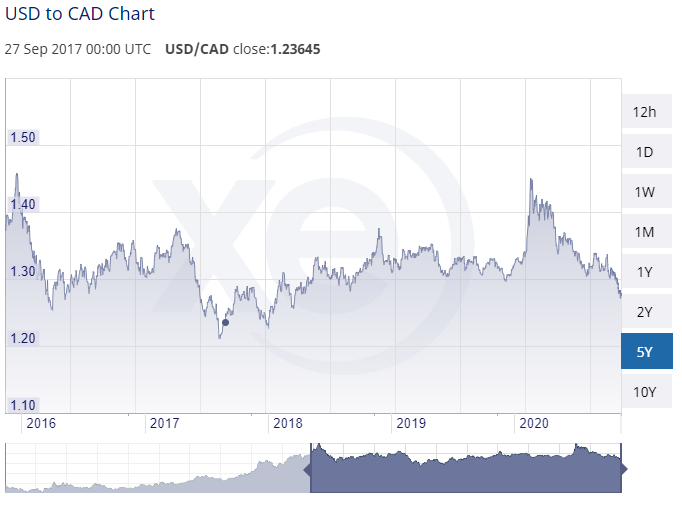

In [16]:
printf("Exchange rate from XE.com as at 28 Sep 2017:")

from IPython.display import Image
Image("img/USD_CAD.png")

In [17]:
printf("Before conversion:")
print(df.loc[6124, ['prices_amountmax', 'prices_amountmin', 'shipping_charges']])

df.at[6124, 'prices_amountmax'] = df.prices_amountmax.loc[6124] / 1.23645
df.at[6124, 'prices_amountmin'] = df.prices_amountmin.loc[6124] / 1.23645
df.at[6124, 'shipping_charges'] = df.shipping_charges.loc[6124] / 1.23645

printf("\nAfter conversion:")
df.loc[6124, ['prices_amountmax', 'prices_amountmin', 'shipping_charges']]

Before conversion:
prices_amountmax   39.990
prices_amountmin   39.990
shipping_charges   18.610
Name: 6124, dtype: object

After conversion:


prices_amountmax   32.343
prices_amountmin   32.343
shipping_charges   15.051
Name: 6124, dtype: object

In [18]:
printf("We will now drop the prices_currency column since it is not useful anymore")
df.drop('prices_currency', axis=1, inplace=True)

We will now drop the prices_currency column since it is not useful anymore


## Weight - 9 runs to cleanup and standardise

In [19]:
printf("Range of values in weight:")
df.weight.unique()

Range of values in weight:


array(['32.8 pounds', '14 pounds', '1.2 pounds', '13.2 pounds',
       '1.6 lb 2.6 lb 1.6 lb 18.7 lb', '1.1 pounds', '1.18 lb',
       '0.14 ounces', '3.2 ounces', '6.7 ounces', '13.6 ounces',
       '0.017 pounds', '1.32 lb', '6.5 pounds', '5.2 pounds', '3 ounces',
       '5.6 ounces', '3.88 oz', '5 pounds', '150 pounds', '2.2 pounds',
       '11.79 pounds', '3.8 pounds', '3.0 lbs', '4 pounds', '4 ounces',
       '1.5 pounds', '5.0 oz', '2.9 lb', '27.8 pounds', '12.5 ounces',
       '26 pounds', '16.48 ounces', '0.8 ounces', '8 pounds', '5.2 lb',
       '18.7 lb', '32 pounds', '7.2 pounds', '34.8 lb', '4.2 pounds',
       '43.2 pounds', '1.52 lb', '0.6 ounces', '1.4 pounds',
       '22.1 pounds', '1.8 pounds', '2.4 ounces', '78.1 pounds',
       '50 pounds', '1.41 pounds', '7.2 ounces', '2 pounds', '2 ounces',
       '1.96 pounds', '3 pounds', '1.25 pounds', '9.3 pounds', '0.63 oz',
       '6.3 pounds', '3.1 lb', '3.3 lb', '8 lb', '8.05 pounds',
       '1.8 lbs                        

In [20]:
printf("We filter out the dataframe that has following phrase in the weight column : Pounds, pounds, lb, ounces, oz")

#weight_grams used as temporary storage for now
df['weight_grams'] = None

#creating search phrases to determine weight
keyword_search = ["Pounds", "pounds", "lb", "ounces", "oz"]
    
def get_weight_filter(df):
    for i in df.index:
        weight = df.at[i, 'weight']
        for word in keyword_search:
            if word in str(weight):
                df.at[i, 'weight_grams'] = 1
                break;
            else:
                df.at[i, 'weight_grams'] = 0

get_weight_filter(df)

printf("The following rows are left that do not contain the phrases:")
temp = df.query("weight_grams == 0")
temp.weight.unique()

We filter out the dataframe that has following phrase in the weight column : Pounds, pounds, lb, ounces, oz
The following rows are left that do not contain the phrases:


array(['Electronics', '18 g', '2.5 Kg', '9.0 kg', '9 Kg', '34 g', '454 g',
       '15.6', '2.7 Kg', '3.2 Kg',
       'http://www.walmart.com/ip/Kenwood-DDX9703S-6-95-Double-DIN-In-Dash-DVD-Receiver-with-Bluetooth-Apple-CarPlay-Android-Auto-HD-Radio-and-SiriusXM-Ready/54695274,https://www.amazon.com/Kenwood-DDX9703S-Stereo-Carplay-Android/dp/B01GITWG5S/,https://www.ebay.com/urw/product-reviews/6003304884?_itm=282520765993,https://www.ebay.com/urw/product-reviews/6003304884?_itm=272989525770,https://www.walmart.com/ip/Kenwood-DDX9703S-6-95-Double-DIN-In-Dash-DVD-Receiver-with-Bluetooth-Apple-CarPlay-Android-Auto-HD-Radio-and-SiriusXM-Ready/54695274,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded,https://www.bestbuy.com/site/kenwood-6-95-android-auto-apple-carplay-built-in-bluetooth-in-dash-cd-dvd-dm-receiver-black/4969400.p?skuId=4969400,http://www.ebay.com/itm/Kenwood-6-95-Android-Auto-Apple-CarPlay-Built-in-Bluetooth-In-Dash-/322229392622?hash=item4b065e54ee,http://

In [21]:
printf("Cleanup #1: We remove values in the weight column with the hyperlink and following phrase: Electronics, 15.6")
printf("\nA null value is inserted as a substitue to remind of an data error in those cells")
printf("\nWe re-run the filter with the following phrase in the weight column : Pounds, pounds, lb, ounces, oz, g, Kg")

#weight_grams used as temporary storage for now
df['weight_grams'] = None

#creating search phrases to determine weight
keyword_search = ["Pounds", "pounds", "lb", "ounces", "oz", "g", "Kg"]
    
def get_weight_filterII(df):
    for i in df.index:
        weight = df.at[i, 'weight']
        
        if str(weight) == "Electronics":
            df.at[i, 'weight'] = ""
            df.at[i, 'weight_grams'] = 0
            
        elif str(weight) == "15.6":
            df.at[i, 'weight'] = ""
            df.at[i, 'weight_grams'] = 0
            
        elif "walmart.com" in str(weight):
            df.at[i, 'weight'] = ""
            df.at[i, 'weight_grams'] = 0
            
        else:
            for word in keyword_search:
                if word in str(weight):
                    df.at[i, 'weight_grams'] = 1
                    break;
                else:
                    df.at[i, 'weight_grams'] = 0

get_weight_filterII(df)

printf("The following rows are left that do not contain the phrases:")
temp = df.query("weight_grams == 0")
temp.weight.unique()

Cleanup #1: We remove values in the weight column with the hyperlink and following phrase: Electronics, 15.6

A null value is inserted as a substitue to remind of an data error in those cells

We re-run the filter with the following phrase in the weight column : Pounds, pounds, lb, ounces, oz, g, Kg
The following rows are left that do not contain the phrases:


array([''], dtype=object)

In [22]:
printf("Cleanup #2: We standardise all pounds to lb'")
printf("Cleanup #3: We standardise all ounces to oz'")

#note 'lbs' is a serach term also and has to be replaced before searching for 'lb'
pounds = ["Pounds", "pounds", "lbs"]
ounce = ["ounces", "oz"]

for i in pounds:
    df.weight = df.weight.str.replace(i, " lb ")
for i in ounce:
    df.weight = df.weight.str.replace(i, " oz ")

# still need to replace 'lb' as we want to include leading and trailing space for easy string splitting later
df.weight = df.weight.str.replace("lb", " lb ")

#replace all leading and trailing whitespace from weight while preserving the space in between the weight and units for easier split later
df.weight = df.weight.str.strip()

df.weight.unique()

Cleanup #2: We standardise all pounds to lb'
Cleanup #3: We standardise all ounces to oz'


array(['32.8   lb', '14   lb', '1.2   lb', '13.2   lb',
       '1.6  lb  2.6  lb  1.6  lb  18.7  lb', '1.1   lb', '1.18  lb',
       '0.14   oz', '3.2   oz', '6.7   oz', '13.6   oz', '0.017   lb',
       '1.32  lb', '6.5   lb', '5.2   lb', '3   oz', '5.6   oz',
       '3.88  oz', '5   lb', '150   lb', '2.2   lb', '11.79   lb',
       '3.8   lb', '3.0   lb', '4   lb', '4   oz', '1.5   lb', '5.0  oz',
       '2.9  lb', '27.8   lb', '12.5   oz', '26   lb', '16.48   oz',
       '0.8   oz', '8   lb', '5.2  lb', '18.7  lb', '32   lb', '7.2   lb',
       '34.8  lb', '4.2   lb', '43.2   lb', '1.52  lb', '0.6   oz',
       '1.4   lb', '22.1   lb', '1.8   lb', '2.4   oz', '78.1   lb',
       '50   lb', '1.41   lb', '7.2   oz', '2   lb', '2   oz',
       '1.96   lb', '3   lb', '1.25   lb', '9.3   lb', '0.63  oz',
       '6.3   lb', '3.1  lb', '3.3  lb', '8  lb', '8.05   lb',
       '1.8   lb                                                                                        1.8   lb',
       '

In [23]:
printf("We now center in on multiple weight entries to find out how they look like'")

#save progress of all cleanups above to weight_grams
#all cleanups will now be done on weight_grams
df.weight_grams = df.weight

def see_multiple_weight():
    count = 0
    row_list = []
    
    for i in df.index:
        weight = df.at[i, 'weight_grams']
        weight_str = str(weight)
        weight_split = weight_str.split()

        if len(weight_split) > count:
            count = len(weight_split)

        if len(weight_split) > 2:
            print("i = ", i, "\tlength = ", len(weight_split), "\tweight = ", weight_str)
            row_list.append(i)

    printf("\nMax number of times weight is recorded for an item =", False); print(count)
    printf("\nNumber of records with multiple entries =", False); print(len(row_list))
    
    return row_list
    
see_multiple_weight();

We now center in on multiple weight entries to find out how they look like'
i =  23 	length =  8 	weight =  1.6  lb  2.6  lb  1.6  lb  18.7  lb
i =  24 	length =  8 	weight =  1.6  lb  2.6  lb  1.6  lb  18.7  lb
i =  25 	length =  8 	weight =  1.6  lb  2.6  lb  1.6  lb  18.7  lb
i =  26 	length =  8 	weight =  1.6  lb  2.6  lb  1.6  lb  18.7  lb
i =  27 	length =  8 	weight =  1.6  lb  2.6  lb  1.6  lb  18.7  lb
i =  385 	length =  4 	weight =  1.8   lb                                                                                        1.8   lb
i =  386 	length =  4 	weight =  1.8   lb                                                                                        1.8   lb
i =  387 	length =  4 	weight =  1.8   lb                                                                                        1.8   lb
i =  549 	length =  4 	weight =  0.8  lb                                                                                       12.8   oz
i =  550 	length =  4 	weight =  

i =  2420 	length =  4 	weight =  1.19   lb                                                                                                  1.19   lb
i =  2421 	length =  4 	weight =  1.19   lb                                                                                                  1.19   lb
i =  2422 	length =  4 	weight =  1.19   lb                                                                                                  1.19   lb
i =  2423 	length =  4 	weight =  1.19   lb                                                                                                  1.19   lb
i =  2424 	length =  4 	weight =  1.19   lb                                                                                                  1.19   lb
i =  2425 	length =  4 	weight =  1.19   lb                                                                                                  1.19   lb
i =  2426 	length =  4 	weight =  1.19   lb                                                   

i =  3195 	length =  4 	weight =  5.7  lb  3.3  lb
i =  3196 	length =  4 	weight =  5.7  lb  3.3  lb
i =  3197 	length =  4 	weight =  5.7  lb  3.3  lb
i =  3198 	length =  4 	weight =  5.7  lb  3.3  lb
i =  3199 	length =  4 	weight =  5.7  lb  3.3  lb
i =  3200 	length =  4 	weight =  5.7  lb  3.3  lb
i =  3201 	length =  4 	weight =  5.7  lb  3.3  lb
i =  3202 	length =  4 	weight =  5.7  lb  3.3  lb
i =  3203 	length =  4 	weight =  5.7  lb  3.3  lb
i =  3204 	length =  4 	weight =  5.7  lb  3.3  lb
i =  3205 	length =  4 	weight =  5.7  lb  3.3  lb
i =  3395 	length =  4 	weight =  1.92   oz                                                                                        1.92   oz
i =  3396 	length =  4 	weight =  1.92   oz                                                                                        1.92   oz
i =  3397 	length =  4 	weight =  1.92   oz                                                                                        1.92   oz
i =  3398 	lengt

i =  4978 	length =  4 	weight =  0.8   oz                                                                                                  0.8   oz
i =  4979 	length =  4 	weight =  0.8   oz                                                                                                  0.8   oz
i =  4980 	length =  4 	weight =  0.8   oz                                                                                                  0.8   oz
i =  4981 	length =  4 	weight =  0.8   oz                                                                                                  0.8   oz
i =  5097 	length =  4 	weight =  1  lb                                                                                                 1   lb
i =  5098 	length =  4 	weight =  1  lb                                                                                                 1   lb
i =  5099 	length =  4 	weight =  1  lb                                                                               

i =  6702 	length =  4 	weight =  0.75  lb                                                                                       12   oz
i =  6703 	length =  4 	weight =  0.75  lb                                                                                       12   oz
i =  6704 	length =  4 	weight =  0.75  lb                                                                                       12   oz
i =  6705 	length =  4 	weight =  0.75  lb                                                                                       12   oz
i =  6706 	length =  4 	weight =  0.75  lb                                                                                       12   oz
i =  6707 	length =  4 	weight =  0.75  lb                                                                                       12   oz
i =  6708 	length =  4 	weight =  0.75  lb                                                                                       12   oz
i =  6709 	length =  4 	weight =  0.75  l

In [24]:
printf("Cleanup #4: Similar and repeated weight entries'")
printf("Cleanup #5: Entries are listed in equivalent units such as these: '0.8 lb  12.8 ounces'")
printf("We run the functions recursively for both cleanups where the weight has more than 2 recordings")

def cleanup4(weight_split):
    if len(weight_split) > 3:
            if (weight_split[0] == weight_split[2]) & (weight_split[1] == weight_split[3]):
                weight_split.pop(0)
                weight_split.pop(0)
                cleanup4(weight_split)        
    return weight_split

def get_weight(weight_split):
    pound = 0
    ounce = 0
    check = True
    if (weight_split[1] == "lb") & (weight_split[3] == "oz"):
        pound = float(weight_split[0]) * 16
        ounce = float(weight_split[2])
    elif (weight_split[3] == "lb") & (weight_split[1] == "oz"):
        pound = float(weight_split[2]) * 16
        ounce = float(weight_split[0])
    else:
        check = False
    
    return pound, ounce, check
    
def cleanup5(weight_split):
    if len(weight_split) > 3:
        pound, ounce, check = get_weight(weight_split)
        if check & (pound == ounce):
            weight_split.pop(0)
            weight_split.pop(0)
            cleanup5(weight_split)

    return weight_split
    
for i in df.index:
    weight = df.at[i, 'weight_grams']
    weight_str = str(weight)
    weight_split = weight_str.split()
    
    weight_split = cleanup4(weight_split)
    weight_split = cleanup5(weight_split)
    
    weight_str = ""
    for j in weight_split:
        if weight_split.index(j) != 0:
            j = " " + j
        weight_str += j
    df.at[i, 'weight_grams'] = weight_str

see_multiple_weight();

Cleanup #4: Similar and repeated weight entries'
Cleanup #5: Entries are listed in equivalent units such as these: '0.8 lb  12.8 ounces'
We run the functions recursively for both cleanups where the weight has more than 2 recordings
i =  23 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  24 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  25 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  26 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  27 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  694 	length =  4 	weight =  13.3 oz 3.2 oz
i =  695 	length =  4 	weight =  13.3 oz 3.2 oz
i =  696 	length =  4 	weight =  13.3 oz 3.2 oz
i =  697 	length =  4 	weight =  13.3 oz 3.2 oz
i =  698 	length =  4 	weight =  13.3 oz 3.2 oz
i =  699 	length =  4 	weight =  13.3 oz 3.2 oz
i =  700 	length =  4 	weight =  13.3 oz 3.2 oz
i =  701 	length =  4 	weight =  13.3 oz 3.2 oz
i =  702 	length =  4 	weight =  13.3 oz 3.2 oz
i =  703 	length =  4 	weight =  13.

In [25]:
printf("Cleanup #6: Modified cleanup 5 so that rounding off error are taken into consideration.")
printf("For eg, at row 1006, we have '0.62 lb 9.9 oz'")
printf("We run the function recursively for the cleanup where the weight has more than 2 recordings")

def cleanup5_tolerance(pound, ounce, tol):
    if abs(pound - ounce) <= tol:
        return True
    else:
        return False

def cleanup5(weight_split, tol):
    if len(weight_split) > 3:
        pound, ounce, check = get_weight(weight_split)
        if check & cleanup5_tolerance(pound, ounce, tol):
            weight_split.pop(0)
            weight_split.pop(0)
            cleanup5(weight_split, tol)

    return weight_split

for i in df.index:
    weight = df.at[i, 'weight_grams']
    weight_str = str(weight)
    weight_split = weight_str.split()
    
    weight_split = cleanup4(weight_split)
    weight_split = cleanup5(weight_split, 0.1)
    
    weight_str = ""
    for j in weight_split:
        if weight_split.index(j) != 0:
            j = " " + j
        weight_str += j
    df.at[i, 'weight_grams'] = weight_str

see_multiple_weight();

Cleanup #6: Modified cleanup 5 so that rounding off error are taken into consideration.
For eg, at row 1006, we have '0.62 lb 9.9 oz'
We run the function recursively for the cleanup where the weight has more than 2 recordings
i =  23 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  24 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  25 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  26 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  27 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  694 	length =  4 	weight =  13.3 oz 3.2 oz
i =  695 	length =  4 	weight =  13.3 oz 3.2 oz
i =  696 	length =  4 	weight =  13.3 oz 3.2 oz
i =  697 	length =  4 	weight =  13.3 oz 3.2 oz
i =  698 	length =  4 	weight =  13.3 oz 3.2 oz
i =  699 	length =  4 	weight =  13.3 oz 3.2 oz
i =  700 	length =  4 	weight =  13.3 oz 3.2 oz
i =  701 	length =  4 	weight =  13.3 oz 3.2 oz
i =  702 	length =  4 	weight =  13.3 oz 3.2 oz
i =  703 	length =  4 	weight =  13.3 oz 3

i =  5213 	length =  4 	weight =  0.96 lb 15.5 oz
i =  5214 	length =  4 	weight =  0.96 lb 15.5 oz
i =  5996 	length =  4 	weight =  14.67 oz 10.41 oz
i =  5997 	length =  4 	weight =  14.67 oz 10.41 oz
i =  5998 	length =  4 	weight =  14.67 oz 10.41 oz
i =  5999 	length =  4 	weight =  14.67 oz 10.41 oz
i =  6000 	length =  4 	weight =  14.67 oz 10.41 oz
i =  6001 	length =  4 	weight =  14.67 oz 10.41 oz
i =  6002 	length =  4 	weight =  14.67 oz 10.41 oz
i =  6003 	length =  4 	weight =  14.67 oz 10.41 oz
i =  6004 	length =  4 	weight =  14.67 oz 10.41 oz
i =  6005 	length =  4 	weight =  14.67 oz 10.41 oz
i =  6006 	length =  4 	weight =  14.67 oz 10.41 oz
i =  6007 	length =  4 	weight =  14.67 oz 10.41 oz
i =  6008 	length =  4 	weight =  14.67 oz 10.41 oz
i =  6009 	length =  4 	weight =  14.67 oz 10.41 oz
i =  6010 	length =  4 	weight =  14.67 oz 10.41 oz
i =  6011 	length =  4 	weight =  14.67 oz 10.41 oz
i =  6012 	length =  4 	weight =  14.67 oz 10.41 oz
i =  6013 	lengt

In [26]:
printf("Cleanup #7: Retain the values within 0.1 tolerance")
printf("For eg, at row 1146, we have '6.35 oz 6.4 oz'")
printf("For those outside of tolerance, we insert null value")
printf("We run the function recursively for the cleanup where the weight has more than 2 recordings")

def cleanup7_tolerance(value1, value2):
    if abs( float(value1) - float(value2) ) <= 0.1:
        return True
    else:
        return False

def cleanup7(weight_split):
    if len(weight_split) > 3:
        if (weight_split[1] == weight_split[3]):
            if ( cleanup7_tolerance( weight_split[0], weight_split[2]) ):        
                weight_split.pop(0)
                weight_split.pop(0)
            else:
                weight_split = []
                weight_split.append("")
            cleanup7(weight_split)
    return weight_split

for i in df.index:
    weight = df.at[i, 'weight_grams']
    weight_str = str(weight)
    weight_split = weight_str.split()
    
    weight_split = cleanup7(weight_split)
    
    weight_str = ""
    for j in weight_split:
        if weight_split.index(j) != 0:
            j = " " + j
        weight_str += j
    df.at[i, 'weight_grams'] = weight_str

see_multiple_weight();

Cleanup #7: Retain the values within 0.1 tolerance
For eg, at row 1146, we have '6.35 oz 6.4 oz'
For those outside of tolerance, we insert null value
We run the function recursively for the cleanup where the weight has more than 2 recordings
i =  23 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  24 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  25 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  26 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  27 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  1045 	length =  6 	weight =  1 lb . 8 oz .
i =  1046 	length =  6 	weight =  1 lb . 8 oz .
i =  1047 	length =  6 	weight =  1 lb . 8 oz .
i =  1048 	length =  6 	weight =  1 lb . 8 oz .
i =  1049 	length =  6 	weight =  1 lb . 8 oz .
i =  1050 	length =  6 	weight =  1 lb . 8 oz .
i =  1051 	length =  6 	weight =  1 lb . 8 oz .
i =  5203 	length =  4 	weight =  0.96 lb 15.5 oz
i =  5204 	length =  4 	weight =  0.96 lb 15.5 oz
i =  5205 	length =  4

In [27]:
printf("Cleanup #8: Modified cleanup 6 to increase tolerance to 0.2")
printf("For eg, at row 5203, we have '0.96 lb 15.5 oz'")

for i in df.index:
    weight = df.at[i, 'weight_grams']
    weight_str = str(weight)
    weight_split = weight_str.split()
    
    #cleanup 8
    weight_split = cleanup5(weight_split, 0.2)
    
    weight_str = ""
    for j in weight_split:
        if weight_split.index(j) != 0:
            j = " " + j
        weight_str += j
    df.at[i, 'weight_grams'] = weight_str

final_rows = see_multiple_weight()

Cleanup #8: Modified cleanup 6 to increase tolerance to 0.2
For eg, at row 5203, we have '0.96 lb 15.5 oz'
i =  23 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  24 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  25 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  26 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  27 	length =  7 	weight =  1.6 lb 2.6 lb1.6 lb 18.7 lb
i =  1045 	length =  6 	weight =  1 lb . 8 oz .
i =  1046 	length =  6 	weight =  1 lb . 8 oz .
i =  1047 	length =  6 	weight =  1 lb . 8 oz .
i =  1048 	length =  6 	weight =  1 lb . 8 oz .
i =  1049 	length =  6 	weight =  1 lb . 8 oz .
i =  1050 	length =  6 	weight =  1 lb . 8 oz .
i =  1051 	length =  6 	weight =  1 lb . 8 oz .

Max number of times weight is recorded for an item =7

Number of records with multiple entries =12


In [28]:
printf("Cleanup #9: The rest of the weights will be deeemed invalid and null value inserted")

for i in final_rows:
    df.at[i, 'weight_grams'] = ""

df.weight_grams.unique()

Cleanup #9: The rest of the weights will be deeemed invalid and null value inserted


array(['32.8 lb', '14 lb', '1.2 lb', '13.2 lb', '', '1.1 lb', '1.18 lb',
       '0.14 oz', '3.2 oz', '6.7 oz', '13.6 oz', '0.017 lb', '1.32 lb',
       '6.5 lb', '5.2 lb', '3 oz', '5.6 oz', '3.88 oz', '5 lb', '150 lb',
       '2.2 lb', '11.79 lb', '3.8 lb', '3.0 lb', '4 lb', '4 oz', '1.5 lb',
       '5.0 oz', '2.9 lb', '27.8 lb', '12.5 oz', '26 lb', '16.48 oz',
       '0.8 oz', '8 lb', '18.7 lb', '32 lb', '7.2 lb', '34.8 lb',
       '4.2 lb', '43.2 lb', '1.52 lb', '0.6 oz', '1.4 lb', '22.1 lb',
       '1.8 lb', '2.4 oz', '78.1 lb', '50 lb', '1.41 lb', '7.2 oz',
       '2 lb', '2 oz', '1.96 lb', '3 lb', '1.25 lb', '9.3 lb', '0.63 oz',
       '6.3 lb', '3.1 lb', '3.3 lb', '8.05 lb', '6.2 oz', '5.4 lb',
       '2.5 lb', '12 oz', '0.46 lb', '1 lb', '3.5 lb', '15.9 lb',
       '0.64 oz', '18.3 lb', '14.4 oz', '13.4 oz', '14.3 lb', '34 lb',
       '1.8 oz', '11.0 lb', '12.8 oz', '7.9 lb', '16.4 lb', '4.8 oz',
       '13.7 lb', '22.0 lb', '9.8 lb', '5.8 lb', '15.0 lb', '4.79 lb',
       '10.1

In [29]:
printf("\nAll existing weights are converted into grams")
printf("Existing error weights will continue to be stored as null, column deleted")
printf("Weight column will be deleted")

def convert_weight(df):
    for i in df.index:
        weight = df.at[i, 'weight_grams']
        weight_str = str(weight)

        #error entries
        if weight_str == "":
            df.at[i, 'weight_grams'] = 0
        else:
            weight_split = weight_str.split()
            if weight_split[1] == "lb":
                weight_split[0] = float(weight_split[0]) * 453.592
            elif weight_split[1] == "oz":
                weight_split[0] = float(weight_split[0]) * 28.3495
            elif weight_split[1] == "Kg":
                weight_split[0] = float(weight_split[0]) * 1000
            elif weight_split[1] == "g":
                weight_split[0] = float(weight_split[0])
                
            weight_split[0] = round(float(weight_split[0]), 2)
            df.at[i, 'weight_grams'] = weight_split[0]

convert_weight(df)
df.drop(['weight'], axis=1, inplace=True)

#convert the column to numeric datatype
df['weight_grams'] = pd.to_numeric(df['weight_grams'])


All existing weights are converted into grams
Existing error weights will continue to be stored as null, column deleted
Weight column will be deleted


## Dates - Denormalise and add estimated price

In [30]:
print(df.prices_dateseen)
printf("Current date is in ISO 8601 format.\nFormatting and sorting it for easier reading so that we know what we need to do:")

for i in df.index:
    datelist = []
    datelist = df.at[i, 'prices_dateseen'].split(',')

    for j in range(len(datelist)):
        datelist[j] = pd.to_datetime(datelist[j]).strftime('%d %B %Y')
    datelist.sort(key=lambda date: pd.to_datetime(date))
    
    df.at[i, 'prices_dateseen'] = datelist

df.prices_dateseen

0       2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...
1                                    2017-12-14T06:00:00Z
2                                    2017-09-08T05:00:00Z
3                                    2017-10-10T05:00:00Z
4                                    2017-08-28T07:00:00Z
                              ...                        
7244                                 2017-10-10T08:00:00Z
7245                                 2018-06-01T12:00:00Z
7246                                 2017-05-18T05:00:00Z
7247                                 2017-08-28T11:00:00Z
7248                                 2017-06-25T12:00:00Z
Name: prices_dateseen, Length: 7246, dtype: object
Current date is in ISO 8601 format.
Formatting and sorting it for easier reading so that we know what we need to do:


0       [03 March 2017, 04 March 2017, 10 March 2017, ...
1                                      [14 December 2017]
2                                     [08 September 2017]
3                                       [10 October 2017]
4                                        [28 August 2017]
                              ...                        
7244                                    [10 October 2017]
7245                                       [01 June 2018]
7246                                        [18 May 2017]
7247                                     [28 August 2017]
7248                                       [25 June 2017]
Name: prices_dateseen, Length: 7246, dtype: object

In [31]:
printf("Example to see current price structure:")
df.head(1)

Example to see current price structure:


,id,prices_amountmax,prices_amountmin,prices_dateseen,prices_merchant,brand,categories,name,primarycategories,shipping_provided,shipping_free,shipping_charges,weight_grams
0,AVphzgbJLJeJML43fA0o,104.990,104.990,"[03 March 2017, 04 March 2017, 10 March 2017, ...",Bestbuy.com,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,0,0,0,"14,877.820"


In [32]:
printf("Create a column for average price")
df['avg_price'] = (df['prices_amountmax'] + df['prices_amountmin']) / 2

Create a column for average price


In [33]:
printf("We assume: (i) Electronics depreciate over time., ie. they become cheaper to buy")
printf("           (ii) depreciation occurs linearly")
printf("\nAn estimated price is tagged to each date of observation based on the assumptions of a simple linear regression")
printf("The average of prices_amountmax and prices_amountmin is used if there is only 1 date observation")
printf("The average of prices_amountmax and prices_amountmin is used if there are multiple dates observation but all on same day but different time")

#setting new columns and retaining all old columns in new df
columnsList = []
for col in df.columns:
    columnsList.append(col)
columnsList.append('date')          #create new column containing a single value of date only
columnsList.append('est_price')     #new column for estimated price
columnsList.append('depreciation')

data = []
i = 0

while i < len(df):
    original_row = df.iloc[i].values
    datelist = df.prices_dateseen.iloc[i]

    if len(datelist) == 1: #only 1 date record observation
        #create new column containing a single value of date only
        original_row = np.append(original_row, datelist[0])
        #estimated price = average price
        original_row = np.append(original_row, df.avg_price.iloc[i])
        original_row = np.append(original_row, 0)
        data.append(original_row)

    else: #multiple dates record observation

        #get the number of days between 1st observed day and last observed day
        first_day = pd.to_datetime(datelist[0])
        last_day = pd.to_datetime(datelist[len(datelist)-1])
        days = (last_day - first_day).days

        if days == 0: #multiple dates belong to same day but different time observation
            #create new column containing a single value of date only
            original_row = np.append(original_row, datelist[0])
            #estimated price = average price
            original_row = np.append(original_row, df.avg_price.iloc[i])
            original_row = np.append(original_row, 0)
            data.append(original_row)

        else: #different days observation
            #depreciation per day
            depreciation = (df.prices_amountmax.iloc[i] - df.prices_amountmin.iloc[i] ) / days

            #create new column containing a single value of date only
            original_row = np.append(original_row, datelist[0])
            #estimated price of first_day = max price
            original_row = np.append(original_row, df.prices_amountmax.iloc[i])
            original_row = np.append(original_row, depreciation)
            data.append(original_row)

            #for the subsequent days in the list
            j = 1
            while j < len (datelist):
                #drop the last 2 values added before iterating and reusing the list again
                original_row = np.delete(original_row, len(original_row)-1)
                original_row = np.delete(original_row, len(original_row)-1)
                original_row = np.delete(original_row, len(original_row)-1)
                #create new column containing a single value of date only
                original_row = np.append(original_row, datelist[j])
                
                day = pd.to_datetime(datelist[j])
                days = (day - first_day).days
                #estimated price = max price - (depreciation * (day - first_day) )
                original_row = np.append(original_row, df.prices_amountmax.iloc[i] - (depreciation * days) )
                original_row = np.append(original_row, depreciation)
                data.append(original_row)
                j += 1
    i += 1

df_new = pd.DataFrame(data, columns = columnsList)

We assume: (i) Electronics depreciate over time., ie. they become cheaper to buy
           (ii) depreciation occurs linearly

An estimated price is tagged to each date of observation based on the assumptions of a simple linear regression
The average of prices_amountmax and prices_amountmin is used if there is only 1 date observation
The average of prices_amountmax and prices_amountmin is used if there are multiple dates observation but all on same day but different time


In [34]:
printf("Example after denormalising the dates and included estimated price:")
df_new.query("id == 'AVpfSFAYLJeJML436OWI' & prices_amountmax == 1499.95")

Example after denormalising the dates and included estimated price:


,id,prices_amountmax,prices_amountmin,prices_dateseen,prices_merchant,brand,categories,name,primarycategories,shipping_provided,shipping_free,shipping_charges,weight_grams,avg_price,date,est_price,depreciation
12087,AVpfSFAYLJeJML436OWI,"1,499.950","1,399.950","[22 June 2017, 25 June 2017, 26 June 2017, 26 ...",Alto Music,Sennheiser,"Over-Ear and On-Ear Headphones,Electronics Fea...",Sennheiser - HD 800 Over-the-Ear Headphones - ...,Electronics,1,1,0.000,260.820,"1,449.950",22 June 2017,"1,499.950",1.190
12088,AVpfSFAYLJeJML436OWI,"1,499.950","1,399.950","[22 June 2017, 25 June 2017, 26 June 2017, 26 ...",Alto Music,Sennheiser,"Over-Ear and On-Ear Headphones,Electronics Fea...",Sennheiser - HD 800 Over-the-Ear Headphones - ...,Electronics,1,1,0.000,260.820,"1,449.950",25 June 2017,"1,496.379",1.190
12089,AVpfSFAYLJeJML436OWI,"1,499.950","1,399.950","[22 June 2017, 25 June 2017, 26 June 2017, 26 ...",Alto Music,Sennheiser,"Over-Ear and On-Ear Headphones,Electronics Fea...",Sennheiser - HD 800 Over-the-Ear Headphones - ...,Electronics,1,1,0.000,260.820,"1,449.950",26 June 2017,"1,495.188",1.190
12090,AVpfSFAYLJeJML436OWI,"1,499.950","1,399.950","[22 June 2017, 25 June 2017, 26 June 2017, 26 ...",Alto Music,Sennheiser,"Over-Ear and On-Ear Headphones,Electronics Fea...",Sennheiser - HD 800 Over-the-Ear Headphones - ...,Electronics,1,1,0.000,260.820,"1,449.950",26 June 2017,"1,495.188",1.190
12091,AVpfSFAYLJeJML436OWI,"1,499.950","1,399.950","[22 June 2017, 25 June 2017, 26 June 2017, 26 ...",Alto Music,Sennheiser,"Over-Ear and On-Ear Headphones,Electronics Fea...",Sennheiser - HD 800 Over-the-Ear Headphones - ...,Electronics,1,1,0.000,260.820,"1,449.950",27 June 2017,"1,493.998",1.190
12092,AVpfSFAYLJeJML436OWI,"1,499.950","1,399.950","[22 June 2017, 25 June 2017, 26 June 2017, 26 ...",Alto Music,Sennheiser,"Over-Ear and On-Ear Headphones,Electronics Fea...",Sennheiser - HD 800 Over-the-Ear Headphones - ...,Electronics,1,1,0.000,260.820,"1,449.950",02 July 2017,"1,488.045",1.190
12093,AVpfSFAYLJeJML436OWI,"1,499.950","1,399.950","[22 June 2017, 25 June 2017, 26 June 2017, 26 ...",Alto Music,Sennheiser,"Over-Ear and On-Ear Headphones,Electronics Fea...",Sennheiser - HD 800 Over-the-Ear Headphones - ...,Electronics,1,1,0.000,260.820,"1,449.950",03 July 2017,"1,486.855",1.190
12094,AVpfSFAYLJeJML436OWI,"1,499.950","1,399.950","[22 June 2017, 25 June 2017, 26 June 2017, 26 ...",Alto Music,Sennheiser,"Over-Ear and On-Ear Headphones,Electronics Fea...",Sennheiser - HD 800 Over-the-Ear Headphones - ...,Electronics,1,1,0.000,260.820,"1,449.950",04 July 2017,"1,485.664",1.190
12095,AVpfSFAYLJeJML436OWI,"1,499.950","1,399.950","[22 June 2017, 25 June 2017, 26 June 2017, 26 ...",Alto Music,Sennheiser,"Over-Ear and On-Ear Headphones,Electronics Fea...",Sennheiser - HD 800 Over-the-Ear Headphones - ...,Electronics,1,1,0.000,260.820,"1,449.950",05 July 2017,"1,484.474",1.190
12096,AVpfSFAYLJeJML436OWI,"1,499.950","1,399.950","[22 June 2017, 25 June 2017, 26 June 2017, 26 ...",Alto Music,Sennheiser,"Over-Ear and On-Ear Headphones,Electronics Fea...",Sennheiser - HD 800 Over-the-Ear Headphones - ...,Electronics,1,1,0.000,260.820,"1,449.950",06 July 2017,"1,483.283",1.190


In [35]:
printf("We will drop the column prices_amountmax, prices_amountmin, prices_dateseen and avg_price since we are not using it")
df_new.drop(['prices_amountmax', 'prices_amountmin', 'prices_dateseen', 'avg_price'], axis=1, inplace=True)

We will drop the column prices_amountmax, prices_amountmin, prices_dateseen and avg_price since we are not using it


In [36]:
printf("Number of records we have now = ", False); print(df_new.shape[0])

Number of records we have now = 22186


In [37]:
df = df_new.copy()

#free memory
import gc
del [df_new]
gc.collect()

df_new = pd.DataFrame()

##  Binning the dates into Month and Year

In [38]:
df['month'] = pd.to_datetime(df.date).dt.month
df

,id,prices_merchant,brand,categories,name,primarycategories,shipping_provided,shipping_free,shipping_charges,weight_grams,date,est_price,depreciation,month
0,AVphzgbJLJeJML43fA0o,Bestbuy.com,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,0,0,0.000,"14,877.820",03 March 2017,104.990,0.000,3
1,AVphzgbJLJeJML43fA0o,Bestbuy.com,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,0,0,0.000,"14,877.820",04 March 2017,104.990,0.000,3
2,AVphzgbJLJeJML43fA0o,Bestbuy.com,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,0,0,0.000,"14,877.820",10 March 2017,104.990,0.000,3
3,AVphzgbJLJeJML43fA0o,Bestbuy.com,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,0,0,0.000,"14,877.820",30 March 2017,104.990,0.000,3
4,AVpgMuGwLJeJML43KY_c,Walmart.com,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,1,1,0.000,"6,350.290",14 December 2017,66.995,0.000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22181,AVpfUsrxLJeJML437Ezd,Bestbuy.com,Lowepro,"Camera & Photo Accessories,Cameras, Camcorders...",Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,0,0,0.000,816.470,10 October 2017,79.990,0.000,10
22182,AVpfUsrxLJeJML437Ezd,bhphotovideo.com,Lowepro,"Camera & Photo Accessories,Cameras, Camcorders...",Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,1,1,0.000,816.470,01 June 2018,68.750,0.000,6
22183,AVpfUsrxLJeJML437Ezd,Bestbuy.com,Lowepro,"Camera & Photo Accessories,Cameras, Camcorders...",Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,0,0,0.000,816.470,18 May 2017,70.990,0.000,5
22184,AVpfUsrxLJeJML437Ezd,Bestbuy.com,Lowepro,"Camera & Photo Accessories,Cameras, Camcorders...",Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,0,0,0.000,816.470,28 August 2017,71.990,0.000,8


In [39]:
df['year'] = pd.to_datetime(df.date).dt.year
df

,id,prices_merchant,brand,categories,name,primarycategories,shipping_provided,shipping_free,shipping_charges,weight_grams,date,est_price,depreciation,month,year
0,AVphzgbJLJeJML43fA0o,Bestbuy.com,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,0,0,0.000,"14,877.820",03 March 2017,104.990,0.000,3,2017
1,AVphzgbJLJeJML43fA0o,Bestbuy.com,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,0,0,0.000,"14,877.820",04 March 2017,104.990,0.000,3,2017
2,AVphzgbJLJeJML43fA0o,Bestbuy.com,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,0,0,0.000,"14,877.820",10 March 2017,104.990,0.000,3,2017
3,AVphzgbJLJeJML43fA0o,Bestbuy.com,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,0,0,0.000,"14,877.820",30 March 2017,104.990,0.000,3,2017
4,AVpgMuGwLJeJML43KY_c,Walmart.com,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,1,1,0.000,"6,350.290",14 December 2017,66.995,0.000,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22181,AVpfUsrxLJeJML437Ezd,Bestbuy.com,Lowepro,"Camera & Photo Accessories,Cameras, Camcorders...",Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,0,0,0.000,816.470,10 October 2017,79.990,0.000,10,2017
22182,AVpfUsrxLJeJML437Ezd,bhphotovideo.com,Lowepro,"Camera & Photo Accessories,Cameras, Camcorders...",Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,1,1,0.000,816.470,01 June 2018,68.750,0.000,6,2018
22183,AVpfUsrxLJeJML437Ezd,Bestbuy.com,Lowepro,"Camera & Photo Accessories,Cameras, Camcorders...",Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,0,0,0.000,816.470,18 May 2017,70.990,0.000,5,2017
22184,AVpfUsrxLJeJML437Ezd,Bestbuy.com,Lowepro,"Camera & Photo Accessories,Cameras, Camcorders...",Lowepro - Slingshot Edge 250 AW Camera Backpac...,Electronics,0,0,0.000,816.470,28 August 2017,71.990,0.000,8,2017


## Merchants - top 3 merchants vs others

In [40]:
printf("Range of values in merchants:")
df.prices_merchant.unique()

Range of values in merchants:


array(['Bestbuy.com', 'Walmart.com', 'California Electronics',
       'Wayfair - Walmart.com', 'Growkart', 'bhphotovideo.com',
       'bargainbrokers', 'Beach Audio Inc', 'Alex Magic Electronics',
       'UnbeatableSale', 'your-best-store', 'BuyVPC', 'tube_works',
       'DigitalShopper', 'gabrians', 'discountparts99',
       'Car Audio Closeout', 'Audiosavings', 'www-sonicelectronix-com',
       'Hotelectronics', 'accessorynet', 'OliveElect, LLC', 'gadget-town',
       'HappEshopper', 'closeoutmartdeals', 'kmaacp', 'AMI Ventures Inc',
       'uShopMall', 'antonline', 'Wayfair - Bestbuy.com',
       'District Camera', 'goldstar_tech', 'buydig', 'Adorama Camera',
       'Wholesale Connection', 'Beach Camera', 'SharpPrices',
       'Technology Galaxy', 'Hippo-Deals', 'OutletPC', 'wwstereo',
       'Buy.com - Bestbuy.com', 'BrownBearTech', 'Aztek Computers',
       'TigerDirect - Walmart.com', 'DealClock', 'DiamondBuy',
       'Hisense USA Corporation', 'My Goods', 'focuscamera',
       '

In [41]:
printf("We assume: (i) Merchants ending with .com are online stores")
printf("           (ii) similar merchants names eg. antonline and antonline.com will be regarded as physical and online store respectively as well")
printf("\nIndividual online sellers are ignored")
printf("\nNew column 'store_online' created to differentiate online and physical stores:")

printf("\nAt the same time above, to reduce typo mistakes in merchants' names, the following is done:")
printf("(i) remove all leading and trailing whitespace;")
printf("(ii) all characters are forced lowercase")

df['store_online'] = None

#creating search phrases to determine merchants
keyword_search = ".com"
    
def get_store_online(df):
    for i in df.index:
        store = df.at[i, 'prices_merchant']
        #if online store, 1. If not, 0
        if keyword_search in str(store):
            df.at[i, 'store_online'] = 1
        else:
            df.at[i, 'store_online'] = 0
        
        #merchants names are forced lowercase and whitespace removed
        store_str = str(store)
        store_str = store_str.lower()
        store_str = store_str.strip()
        df.at[i, 'prices_merchant'] = store_str

get_store_online(df)
df.store_online.unique()

We assume: (i) Merchants ending with .com are online stores
           (ii) similar merchants names eg. antonline and antonline.com will be regarded as physical and online store respectively as well

Individual online sellers are ignored

New column 'store_online' created to differentiate online and physical stores:

At the same time above, to reduce typo mistakes in merchants' names, the following is done:
(i) remove all leading and trailing whitespace;
(ii) all characters are forced lowercase


array([1, 0], dtype=object)

In [42]:
printf("Top merchants by items separated by online and offline merchants")
# df['sales_item'] = df.groupby('prices_merchant')['id'].transform('count')
df.groupby(['store_online', 'prices_merchant'])['id'].count().sort_values(ascending=False)

Top merchants by items separated by online and offline merchants


store_online  prices_merchant                
1             bestbuy.com                        10796
              bhphotovideo.com                    6068
              walmart.com                         1276
0             beach camera                         350
              buydig                               138
                                                 ...  
              miekadut                               1
              mike_gamesnmore                        1
              mikromarc                              1
              mjwireless                             1
              1 stop electronics center, inc.        1
Name: id, Length: 681, dtype: int64

In [43]:
printf("Top merchants by value separated by online and offline merchants")
# df['sales_value'] = df.groupby('prices_merchant')['est_price'].transform('sum')
df.groupby(['store_online', 'prices_merchant'])['est_price'].sum().sort_values(ascending=False)

Top merchants by value separated by online and offline merchants


store_online  prices_merchant 
1             bestbuy.com        4,251,508.020
              bhphotovideo.com   3,031,453.960
              walmart.com          606,051.323
0             beach camera         539,939.913
              gear4less            198,976.550
                                      ...     
              pasbuy                     7.990
              ditech_store               7.950
              cable-n-chargers           7.450
              onlycellphone              6.990
              dvcom llc                  6.450
Name: est_price, Length: 681, dtype: float64

In [44]:
printf("We now concentrate on the cleaning up for the top 3 merchants")

printf("\nOther merchants with 'wal' : ")
df["check"]= df["prices_merchant"].str.find("wal")
df.query("check != -1").prices_merchant.unique()

We now concentrate on the cleaning up for the top 3 merchants

Other merchants with 'wal' : 


array(['walmart.com', 'wayfair - walmart.com',
       'tigerdirect - walmart.com', 'circuit city - walmart.com',
       'tekenvy - walmart.com', 'pcrush - walmart.com',
       'isave - walmart.com', 'music123 - walmart.com', 'walts tv',
       'wal-mart com', 'beach audio inc - walmart.com', 'waltstv',
       'focus camera - walmart.com', 'shoplet - walmart.com', 'walmarked'],
      dtype=object)

In [45]:
printf("Other merchants with 'best' : ")
df["check"]= df["prices_merchant"].str.find("best")
df.query("check != -1").prices_merchant.unique()

Other merchants with 'best' : 


array(['bestbuy.com', 'your-best-store', 'wayfair - bestbuy.com',
       'buy.com - bestbuy.com', 'best buy', '123stores - bestbuy.com',
       'best_buy', 'bestserviceguys', 'www-bestelectronicsoutlet-com',
       'bestelectronics1982'], dtype=object)

In [46]:
printf("Other merchants with 'bhp' : ")
df["check"]= df["prices_merchant"].str.find("bhp")
df.query("check != -1").prices_merchant.unique()

Other merchants with 'bhp' : 


array(['bhphotovideo.com'], dtype=object)

In [47]:
printf("Replacing 'wal-mart com' with 'walmart.com' ")
df.prices_merchant = df.prices_merchant.str.replace("wal-mart com", "walmart.com")
df["check"]= df["prices_merchant"].str.find("wal")
df.query("check != -1").prices_merchant.unique()

Replacing 'wal-mart com' with 'walmart.com' 


array(['walmart.com', 'wayfair - walmart.com',
       'tigerdirect - walmart.com', 'circuit city - walmart.com',
       'tekenvy - walmart.com', 'pcrush - walmart.com',
       'isave - walmart.com', 'music123 - walmart.com', 'walts tv',
       'beach audio inc - walmart.com', 'waltstv',
       'focus camera - walmart.com', 'shoplet - walmart.com', 'walmarked'],
      dtype=object)

In [48]:
printf("The column 'store_online' is dropped now that we have identified the major sellers by value and items, both offline and online")
df.drop(['store_online'], axis=1, inplace=True)
#remove the temporary check column as well 
df.drop(['check'], axis=1, inplace=True)

The column 'store_online' is dropped now that we have identified the major sellers by value and items, both offline and online


In [49]:
printf("Having identified the major merchants: bestbuy.com, bhphotovideo.com and walmart.com, we will label the rest as 'others'")
df['prices_merchant'] = np.where(df['prices_merchant'].isin(['bestbuy.com', 'bhphotovideo.com', 'walmart.com']), df['prices_merchant'], 'others')
df.prices_merchant.unique()

Having identified the major merchants: bestbuy.com, bhphotovideo.com and walmart.com, we will label the rest as 'others'


array(['bestbuy.com', 'walmart.com', 'others', 'bhphotovideo.com'],
      dtype=object)

## Create checkpoint to save progress

In [50]:
df.to_csv('Data\electronics_processed.csv', index = False)